# Imported Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
pd.set_option('display.max_columns', None)

from sklearn import preprocessing
from sklearn import ensemble
from sklearn import gaussian_process
from sklearn import linear_model
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn import svm
from sklearn import tree
from sklearn import discriminant_analysis
from sklearn import model_selection
from xgboost.sklearn import XGBClassifier 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import ADASYN
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
df.describe()

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

In [5]:
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

<AxesSubplot:>

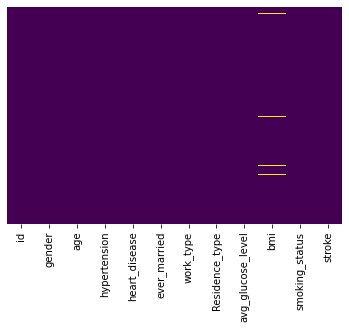

In [6]:
sns.heatmap(df.isnull(), yticklabels=False,cbar=False, cmap='viridis')

After dropping null values from BMI

Null values exists only in BMI column hence removing all the null values.

In [7]:
df1=df.dropna(axis=0)

Exploring all the column values

Removing outliers

In [8]:
print(df1[df1["gender"] == "Other"])

         id gender   age  hypertension  heart_disease ever_married work_type  \
3116  56156  Other  26.0             0              0           No   Private   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
3116          Rural             143.33  22.4  formerly smoked       0  


As only one value with gender as other exists in data hence removing it.

In [9]:
df1 = df1[~(df1["gender"] == "Other")]

In [10]:
df1.gender.unique()

array(['Male', 'Female'], dtype=object)

below are the columns which will be encoded to numerical data.

    gender
    ever_married
    work_type
    Residence_type
    smoking_status



In [11]:
df1['smoking_status'].value_counts()

never smoked       1852
Unknown            1483
formerly smoked     836
smokes              737
Name: smoking_status, dtype: int64

In [13]:
df1 = df1[~df1['smoking_status'].isin(['Unknown'])]


In [14]:
df1['gender_male'] = df1['gender'].replace(['Male', 'Female'],[1,0])

In [15]:
df1['ever_married'] = df1['ever_married'].replace(['Yes', 'No'],[1,0])

In [16]:
df1['Residence_type_urban'] = df1['Residence_type'].replace(['Urban', 'Rural'],[1,0])

Feature Engineering:

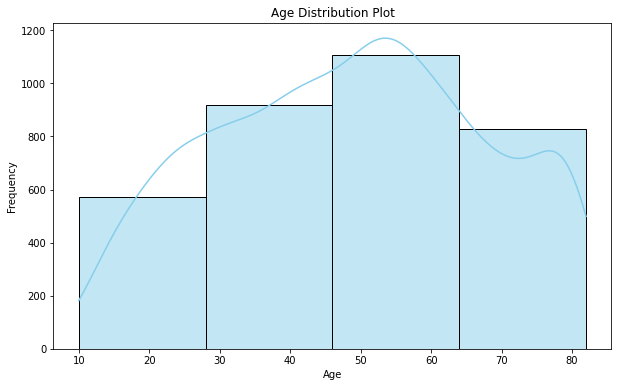

In [17]:
# Assuming 'df' is your DataFrame with the 'age' column
plt.figure(figsize=(10, 6))
sns.histplot(df1['age'], bins=4, kde=True, color='skyblue')
plt.title('Age Distribution Plot')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [18]:
age_bins = [0, 25, 45, 61, 82] 
age_labels = ['0-25', '26-45', '46-61', '62-82']

In [19]:
# Create a new column 'age_group' with the bin labels
df1['age_group'] = pd.cut(df1['age'], bins=age_bins, labels=age_labels, include_lowest=True)

In [20]:
# Display the first few rows of the DataFrame with the new 'age_group' column
print(df1[['age', 'age_group']].head())

    age age_group
0  67.0     62-82
2  80.0     62-82
3  49.0     46-61
4  79.0     62-82
5  81.0     62-82


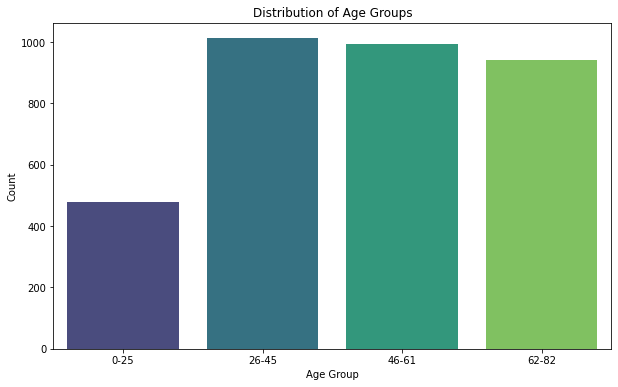

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', data=df1, palette='viridis')
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

The models that we have in plan can handle ordinal encoding, hence we will be using ordinal encoding for this column

In [22]:
from sklearn.preprocessing import OrdinalEncoder

In [23]:
ordinal_encoder = OrdinalEncoder(categories=[['0-25', '26-45', '46-61', '62-82']])
df1['age_group_encoded'] = ordinal_encoder.fit_transform(df1[['age_group']])

In [24]:
df1.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'gender_male', 'Residence_type_urban',
       'age_group', 'age_group_encoded'],
      dtype='object')

In [25]:
bmi_bins = [0, 18.5, 24.9, 29.9, 100]  # Adjust these bins based on your requirements
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
# Create a new column 'bmi_category' with the bin labels
df1['bmi_category'] = pd.cut(df1['bmi'], bins=bmi_bins, labels=bmi_labels, include_lowest=True)

# Display the first few rows of the DataFrame with the new 'bmi_category' column
print(df1[['bmi', 'bmi_category']].head())

    bmi bmi_category
0  36.6        Obese
2  32.5        Obese
3  34.4        Obese
4  24.0       Normal
5  29.0   Overweight


In [26]:
df1.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'gender_male', 'Residence_type_urban',
       'age_group', 'age_group_encoded', 'bmi_category'],
      dtype='object')

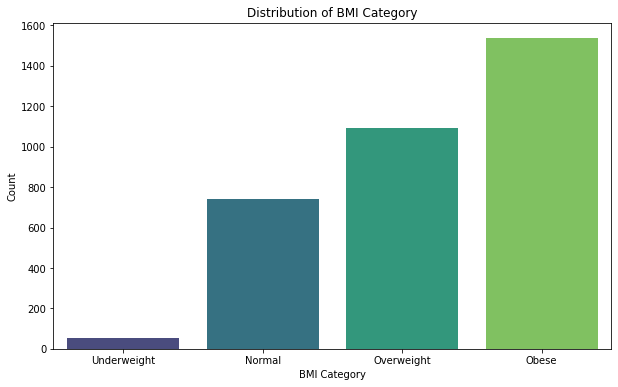

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='bmi_category', data=df1, palette='viridis')
plt.title('Distribution of BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.show()

In [28]:
df1.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'gender_male', 'Residence_type_urban',
       'age_group', 'age_group_encoded', 'bmi_category'],
      dtype='object')

In [29]:
dummies = pd.get_dummies(df1, columns = ["work_type", "smoking_status","bmi_category"])

In [30]:
df2 = dummies

Dropping useless columns

In [31]:
df2.head(1)

id gender   age  hypertension  heart_disease  ever_married  \
0  9046   Male  67.0             0              1             1   

  Residence_type  avg_glucose_level   bmi  stroke  gender_male  \
0          Urban             228.69  36.6       1            1   

   Residence_type_urban age_group  age_group_encoded  work_type_Govt_job  \
0                     1     62-82                3.0                   0   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                       0                  1                        0   

   work_type_children  smoking_status_formerly smoked  \
0                   0                               1   

   smoking_status_never smoked  smoking_status_smokes  \
0                            0                      0   

   bmi_category_Underweight  bmi_category_Normal  bmi_category_Overweight  \
0                         0                    0                        0   

   bmi_category_Obese  
0                   1

In [37]:
#dataframe with feature engineered column
df2.drop(['id','gender','age','Residence_type','age_group','bmi'], axis=1, inplace =True)
df2.head()

hypertension  heart_disease  ever_married  avg_glucose_level  stroke  \
0             0              1             1             228.69       1   
2             0              1             1             105.92       1   
3             0              0             1             171.23       1   
4             1              0             1             174.12       1   
5             0              0             1             186.21       1   

   gender_male  Residence_type_urban  age_group_encoded  work_type_Govt_job  \
0            1                     1                3.0                   0   
2            1                     0                3.0                   0   
3            0                     1                2.0                   0   
4            0                     0                3.0                   0   
5            1                     1                3.0                   0   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                       0                  1                        0   
2                       0                  1                        0   
3                       0                  1                        0   
4                       0                  0                        1   
5                       0                  1                        0   

   work_type_children  smoking_status_formerly smoked  \
0                   0                               1   
2                   0                               0   
3                   0                               0   
4                   0                               0   
5                   0                               1   

   smoking_status_never smoked  smoking_status_smokes  \
0                            0                      0   
2                            1                      0   
3                            0                      1   
4                            1                      0   
5                            0                      0   

   bmi_category_Underweight  bmi_category_Normal  bmi_category_Overweight  \
0                         0                    0                        0   
2                         0                    0                        0   
3                         0                    0                        0   
4                         0                    1                        0   
5                         0                    0                        1   

   bmi_category_Obese  
0                   1  
2                   1  
3                   1  
4                   0  
5                   0

In [38]:
df2.isna().sum()

hypertension                      0
heart_disease                     0
ever_married                      0
avg_glucose_level                 0
stroke                            0
gender_male                       0
Residence_type_urban              0
age_group_encoded                 0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
bmi_category_Underweight          0
bmi_category_Normal               0
bmi_category_Overweight           0
bmi_category_Obese                0
dtype: int64

Doing EDA

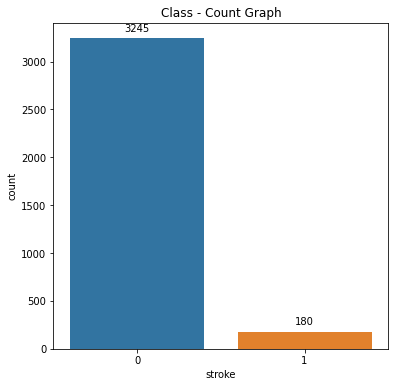

In [40]:
# Assuming 'df2' is your DataFrame
plt.figure(figsize=(6, 6))
ax = sns.countplot(x='stroke', data=df2)

# Annotate each bar with its count using sns.barplot
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('stroke')
plt.title('Class - Count Graph')
plt.show()

In [41]:
df2['stroke'].value_counts()

0    3245
1     180
Name: stroke, dtype: int64

In [43]:
#normalizing data for df2

scaler = StandardScaler()
columns = ["avg_glucose_level"]
df3 = df2.copy()
df3[columns] = scaler.fit_transform(df3[columns])
df3.head()

hypertension  heart_disease  ever_married  avg_glucose_level  stroke  \
0             0              1             1           2.523666       1   
2             0              1             1          -0.050140       1   
3             0              0             1           1.319048       1   
4             1              0             1           1.379636       1   
5             0              0             1           1.633096       1   

   gender_male  Residence_type_urban  age_group_encoded  work_type_Govt_job  \
0            1                     1                3.0                   0   
2            1                     0                3.0                   0   
3            0                     1                2.0                   0   
4            0                     0                3.0                   0   
5            1                     1                3.0                   0   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                       0                  1                        0   
2                       0                  1                        0   
3                       0                  1                        0   
4                       0                  0                        1   
5                       0                  1                        0   

   work_type_children  smoking_status_formerly smoked  \
0                   0                               1   
2                   0                               0   
3                   0                               0   
4                   0                               0   
5                   0                               1   

   smoking_status_never smoked  smoking_status_smokes  \
0                            0                      0   
2                            1                      0   
3                            0                      1   
4                            1                      0   
5                            0                      0   

   bmi_category_Underweight  bmi_category_Normal  bmi_category_Overweight  \
0                         0                    0                        0   
2                         0                    0                        0   
3                         0                    0                        0   
4                         0                    1                        0   
5                         0                    0                        1   

   bmi_category_Obese  
0                   1  
2                   1  
3                   1  
4                   0  
5                   0

In [44]:
df_org.head(2)

age  hypertension  heart_disease  ever_married  avg_glucose_level   bmi  \
0  67.0             0              1             1             228.69  36.6   
2  80.0             0              1             1             105.92  32.5   

   stroke  gender_male  Residence_type_urban  work_type_Govt_job  \
0       1            1                     1                   0   
2       1            1                     0                   0   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                       0                  1                        0   
2                       0                  1                        0   

   work_type_children  smoking_status_formerly smoked  \
0                   0                               1   
2                   0                               0   

   smoking_status_never smoked  smoking_status_smokes  
0                            0                      0  
2                            1                      0

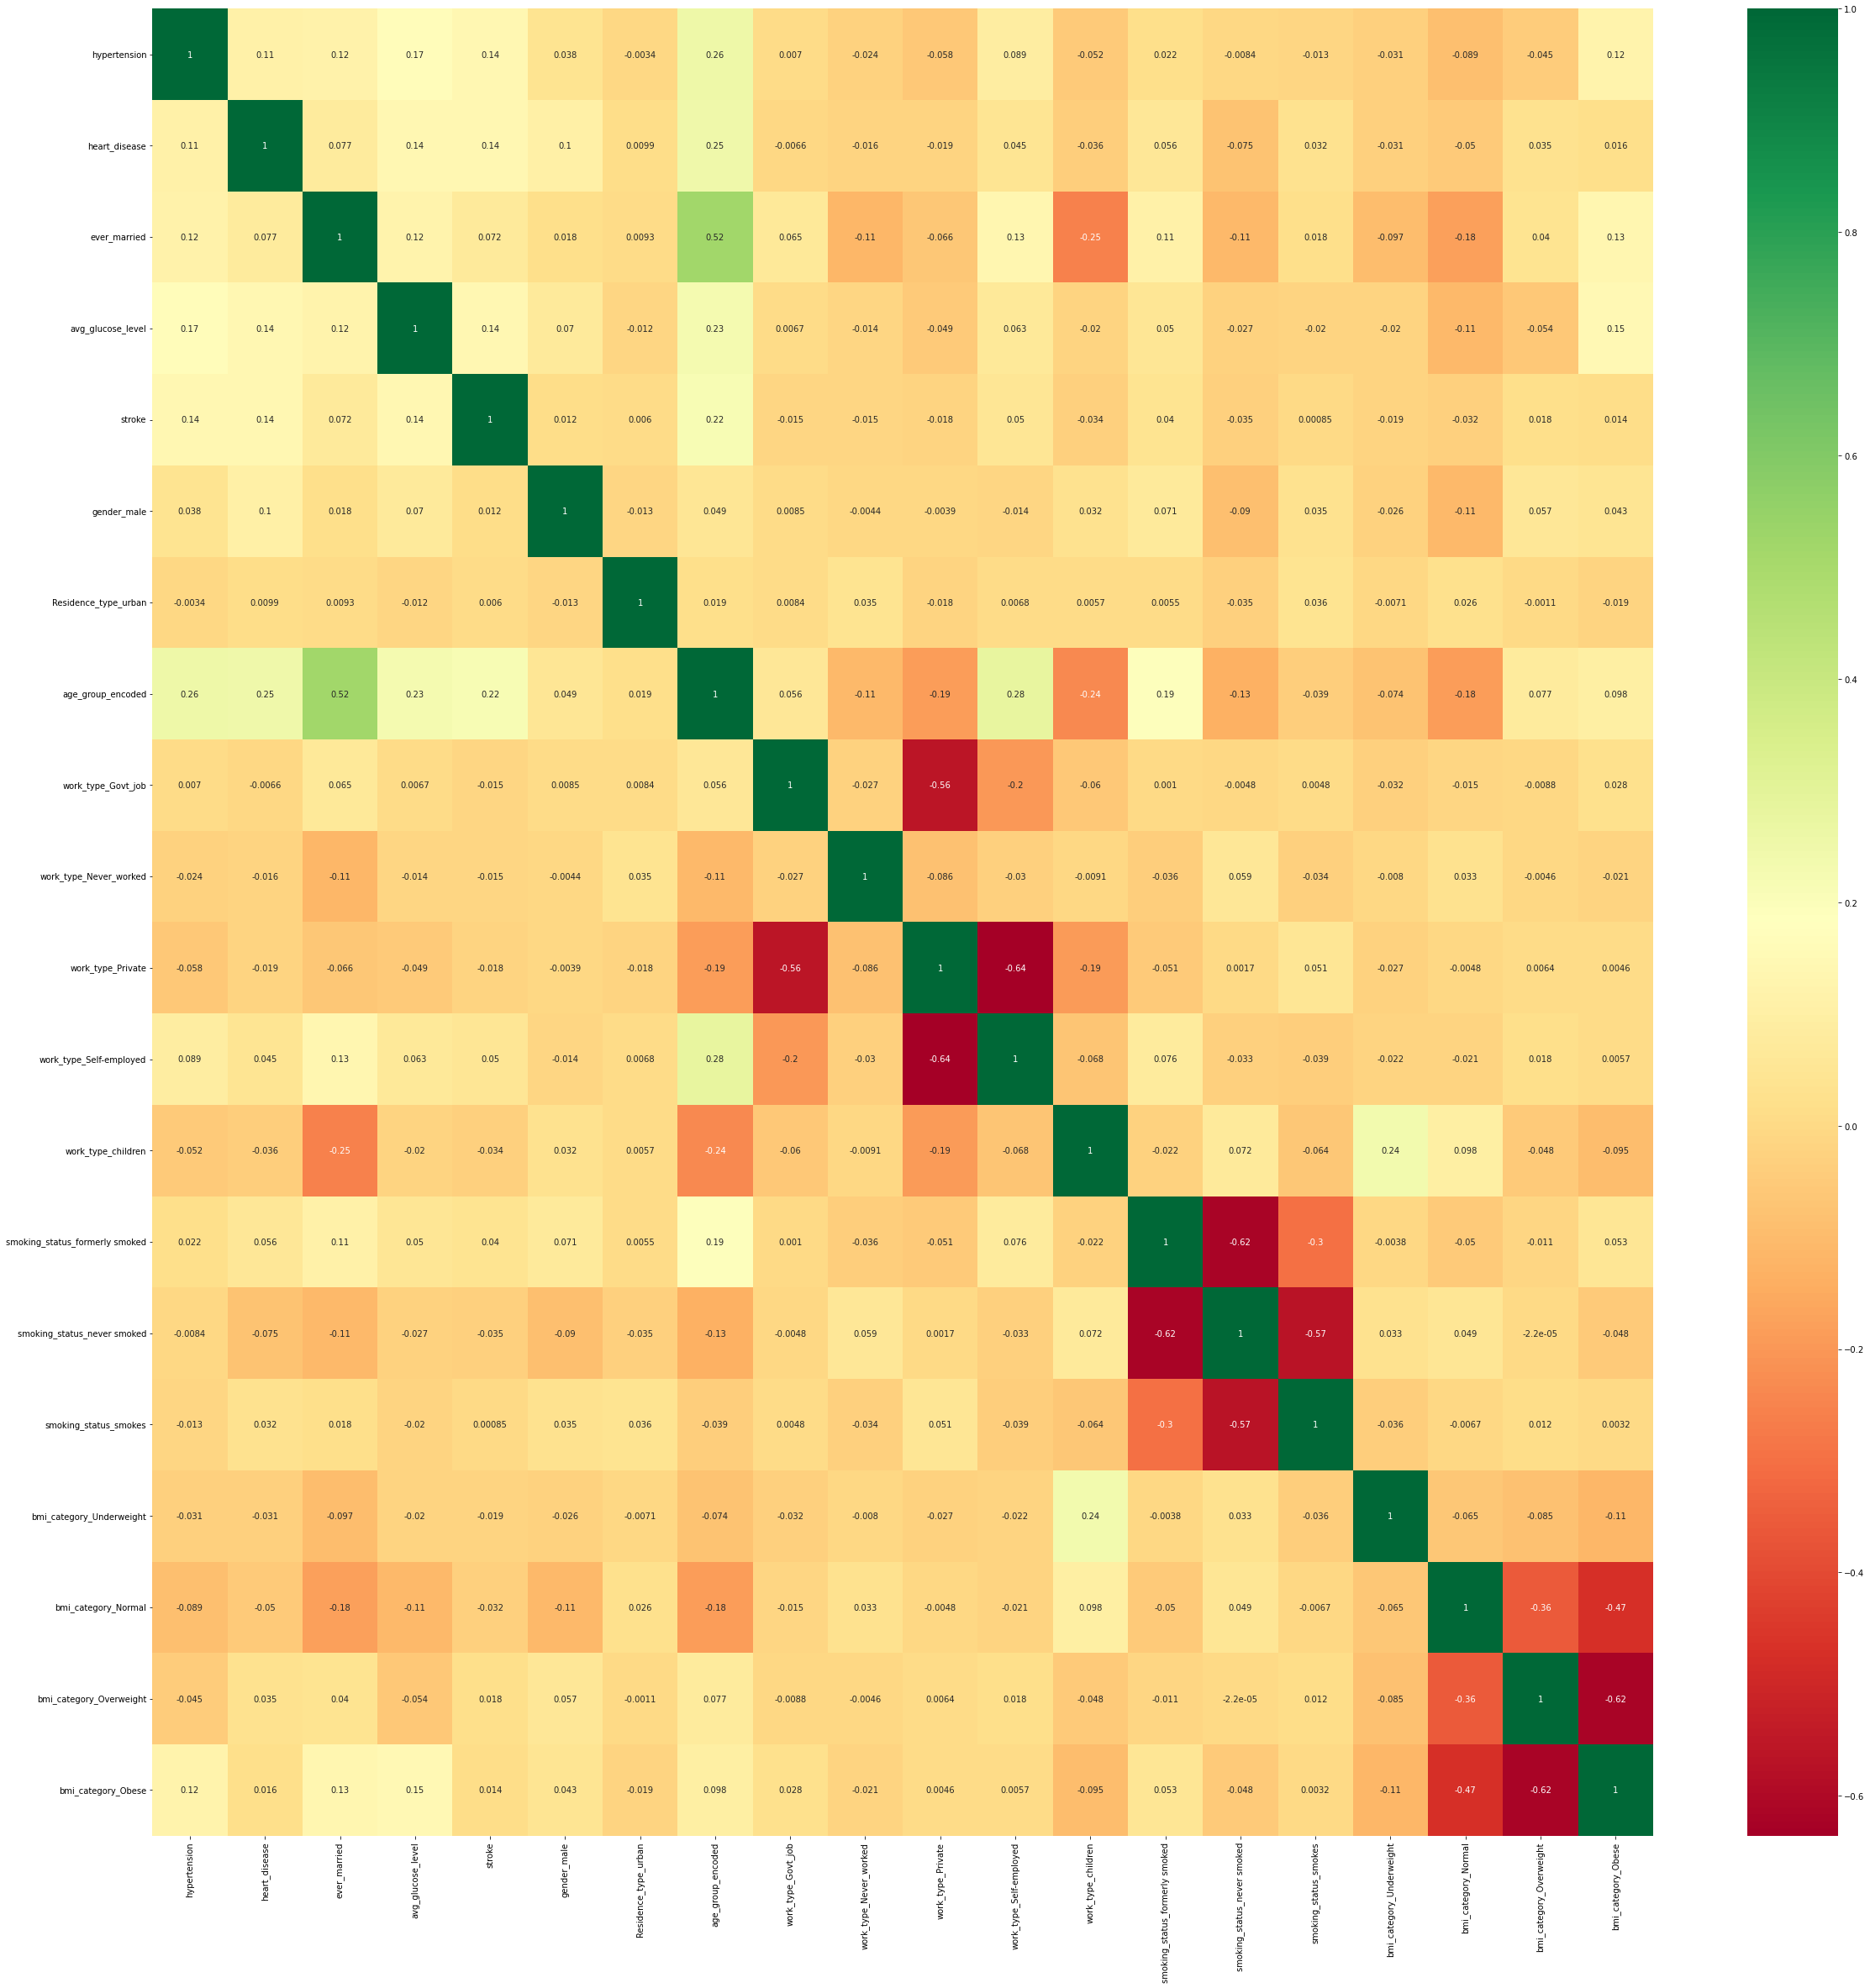

In [46]:
#get correlations of each features in dataset with feature Engineering
corrmat = df3.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(40,40))
#plot heat map
g=sns.heatmap(df3[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Text(0.5, 1.02, 'Feature Distribution')

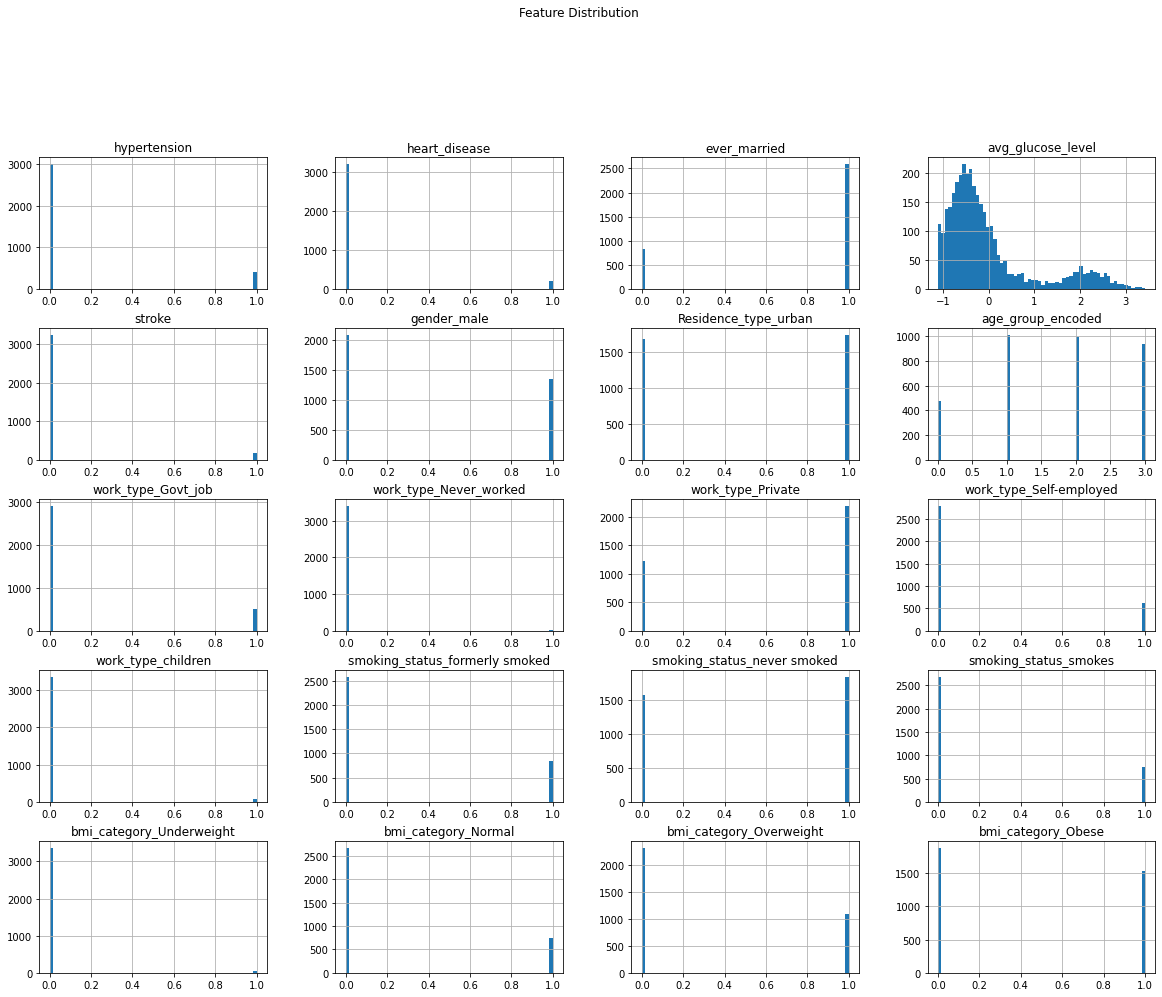

In [48]:
df3.hist(bins = 60, figsize = (20, 15))
plt.suptitle("Feature Distribution", x = 0.5, y = 1.02, ha = "center")

Text(0.5, 0.98, 'Feature Distribution')

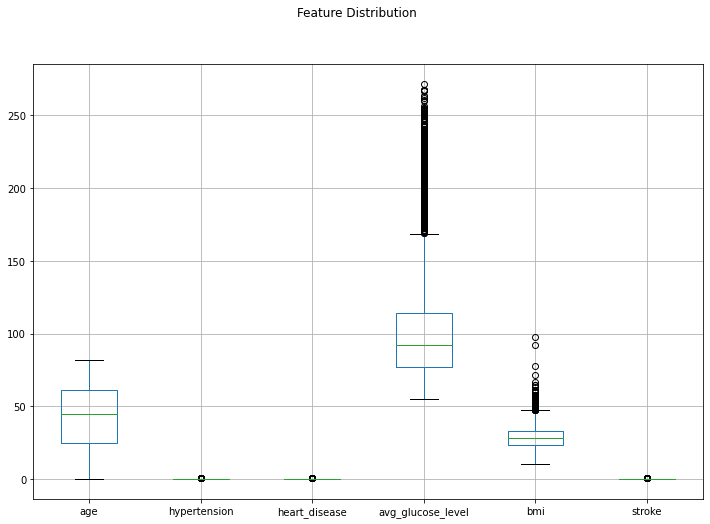

In [50]:
vis_df = df.drop(["id"], axis = 1)
vis_df.boxplot(figsize = (12, 8))
plt.suptitle("Feature Distribution")

In [51]:
def pieplot(df, column):
    label = df[column].unique().tolist()
    data = df[column].value_counts()
    plt.figure(figsize = (5, 5))
    plt.pie(data, labels = label, autopct = "%.0f%%")
    plt.title(column)
    plt.show()

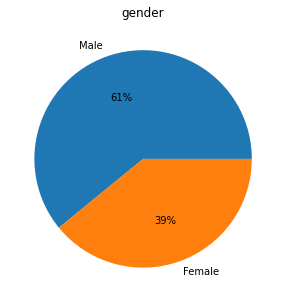

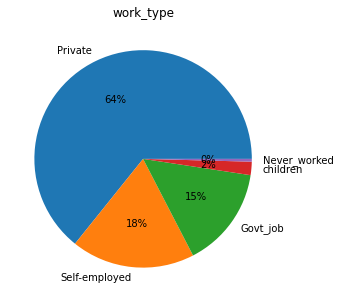

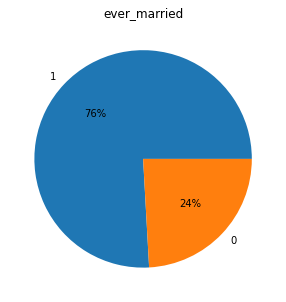

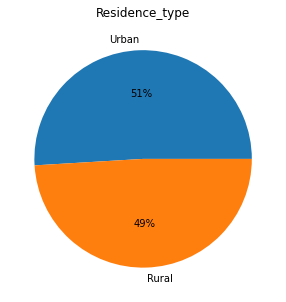

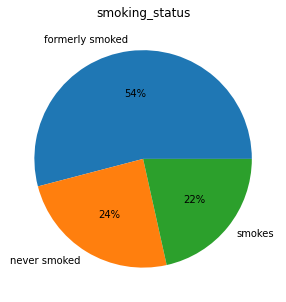

In [52]:
lists_of_plots = ["gender", "work_type", "ever_married", "Residence_type", "smoking_status"]
for i in range(len(lists_of_plots)):
    pieplot(df1, lists_of_plots[i])

[]

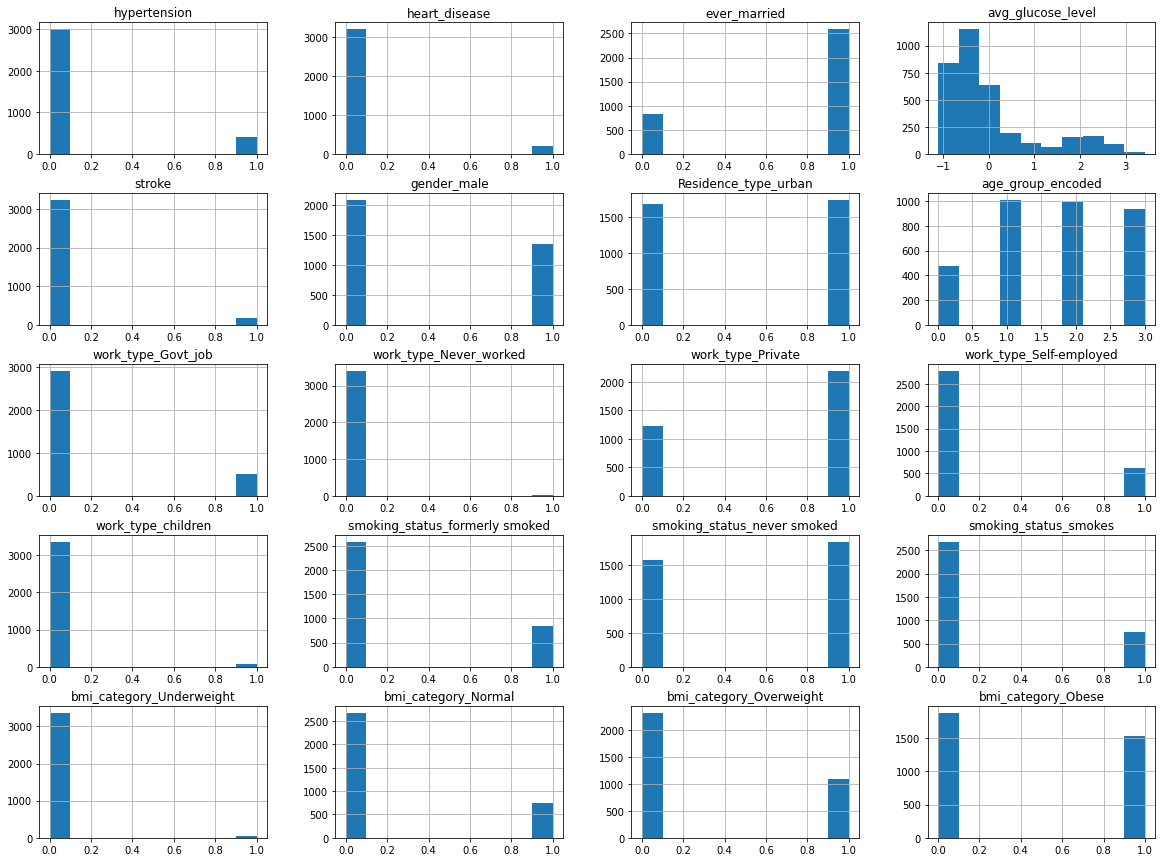

In [53]:
df3.hist(figsize=(20,15),)
plt.plot()

[]

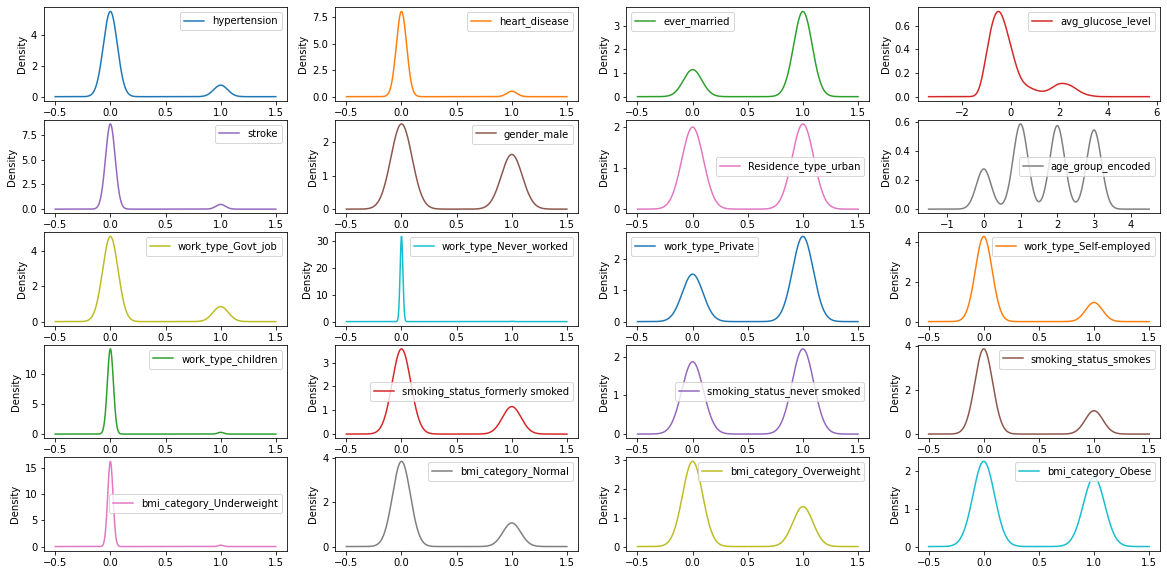

In [55]:
df3.plot(kind='kde', subplots=True, figsize=(20,10),
              layout=(-1, 4), sharex=False)
plt.plot()

[]

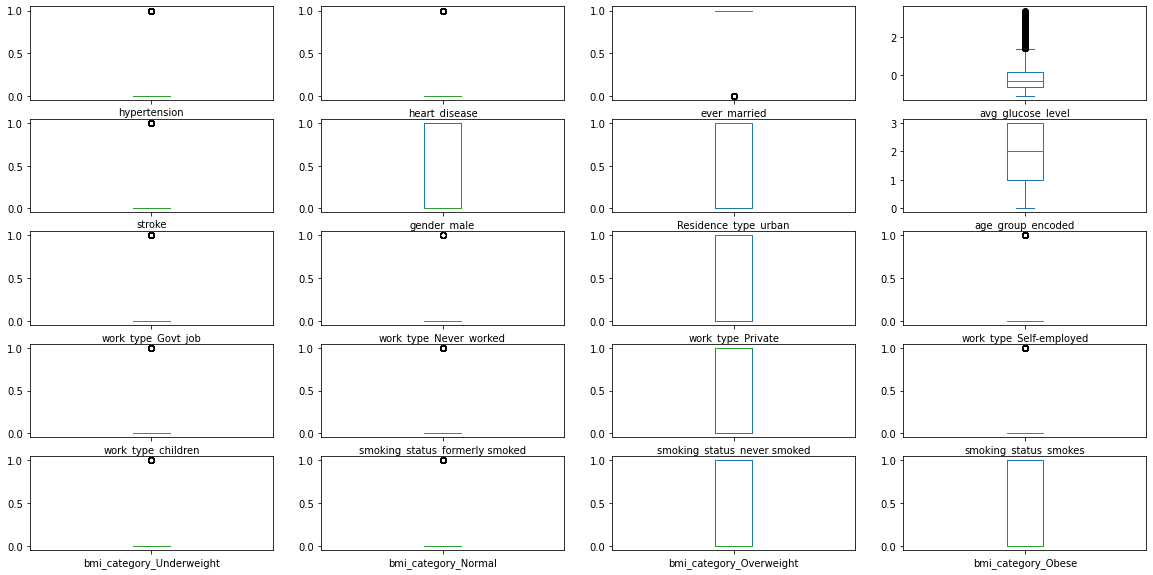

In [56]:
df3.plot(kind='box', subplots=True, figsize=(20,10),
              layout=(-1, 4), sharex=False)
plt.plot()

[]

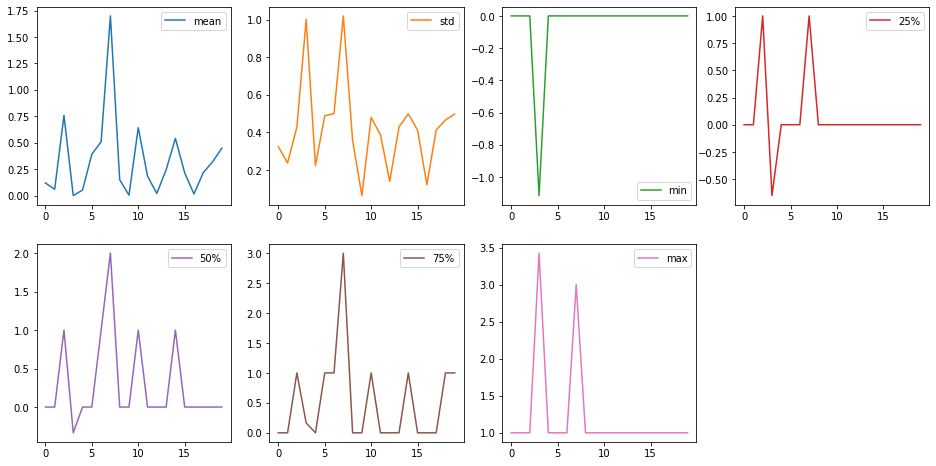

In [57]:
desc = df3.describe().transpose()
desc_copy = desc.reset_index(drop=True).drop('count', axis=1)
desc_copy.plot(kind='line', subplots=True, figsize=(16,8),
              layout=(-1, 4), sharex=False)
plt.plot()

In [58]:
desc = df3.describe().transpose()

In [59]:
desc_copy = desc.reset_index(drop=True).drop('count', axis=1)

[]

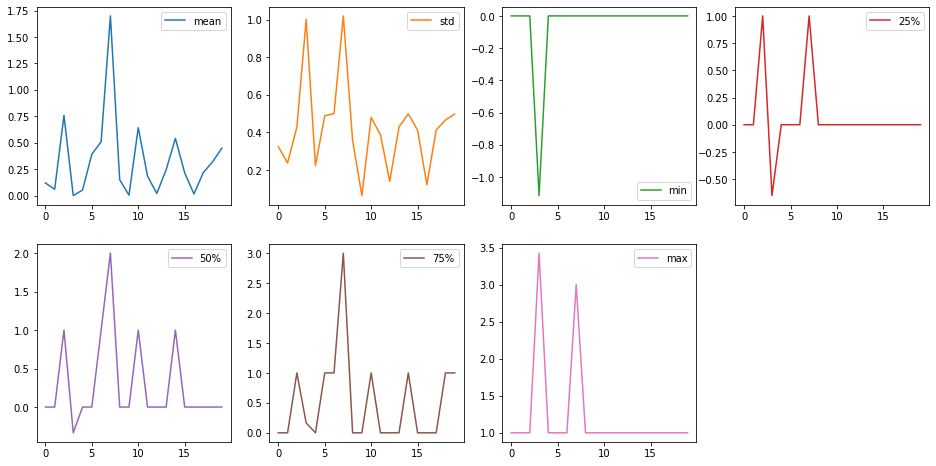

In [60]:
desc_copy.plot(kind='line', subplots=True, figsize=(16,8),
              layout=(-1, 4), sharex=False)
plt.plot()

In [61]:
df3['stroke'].value_counts()

0    3245
1     180
Name: stroke, dtype: int64

# Splitting data into X and y

In [116]:
X = df3.drop("stroke", axis = 1)
y = df3.stroke

# Oversampling the data using ADASYN 

In [117]:
# Apply ADASYN to address class imbalance in the training set
adasyn = ADASYN()
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)



# Optionally, you can print the shapes to verify the sizes of the datasets
print("X_train_resampled shape:", X_train.shape)
print("y_train_resampled shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train_resampled shape: (4178, 19)
y_train_resampled shape: (4178,)
X_val shape: (1045, 19)
y_val shape: (1045,)
X_test shape: (1306, 19)
y_test shape: (1306,)


In [118]:
Counter(y_test)

Counter({1: 636, 0: 670})

In [119]:
Counter(y_val)

Counter({0: 538, 1: 507})

In [120]:
Counter(y_train)

Counter({1: 2141, 0: 2037})

# Applying Different Stacking Combination

# Simple Stacking

>lr 0.806 (0.021)
>knn 0.880 (0.014)
>RFC 0.924 (0.011)
>svm 0.854 (0.015)
>GB 0.871 (0.016)
>stacking 0.911 (0.013)


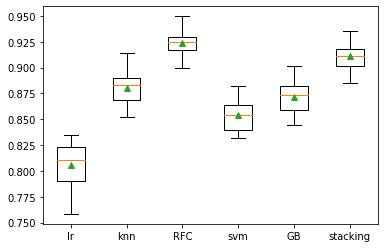

In [121]:
# compare ensemble to each baseline classifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot


# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['RFC']=RandomForestClassifier()
    models['svm'] = SVC()
    models['GB']=GradientBoostingClassifier()
    models['stacking'] = get_stacking()
    return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores


# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Hyperparameter Tunning

In [122]:
from sklearn.model_selection import RandomizedSearchCV

knn= KNeighborsClassifier()

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],        
    'weights': ['uniform', 'distance'], 
    'p': [1, 2]                
}



random_search_knn = RandomizedSearchCV(knn, param_distributions=param_grid_knn, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search_knn.fit(X_train, y_train)


best_params_knn = random_search_knn.best_params_
print("Best Hyperparameters for knn:", best_params_knn)




Best Hyperparameters for knn: {'weights': 'distance', 'p': 1, 'n_neighbors': 3}


In [123]:

rfc = RandomForestClassifier()
param_grid_rfc = {
    'n_estimators': [50, 100, 200],     
    'max_depth': [None, 10, 20, 30],    
    'min_samples_split': [2, 5, 10],    
    'min_samples_leaf': [1, 2, 4]       
    
}

random_search_rfc = RandomizedSearchCV(rfc, param_distributions=param_grid_rfc, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search_rfc.fit(X_train, y_train)

best_params_rfc = random_search_rfc.best_params_
print("Best Hyperparameters for Random Forrest Classifier:", best_params_rfc)

Best Hyperparameters for Random Forrest Classifier: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}


In [124]:
svc=SVC()
param_grid_svc = {
    'C': [0.1, 1, 10],            
    'kernel': ['linear', 'rbf'],  
    'gamma': ['scale', 'auto', 0.1, 0.01],  
    'degree': [2, 3, 4],           
    'coef0': [0.0, 1.0, 2.0]       
}

random_search_svc = RandomizedSearchCV(svc, param_distributions=param_grid_svc, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search_svc.fit(X_train, y_train)

best_params_svc = random_search_svc.best_params_
print("Best Hyperparameters for svc:", best_params_svc)

Best Hyperparameters for svc: {'kernel': 'rbf', 'gamma': 'scale', 'degree': 3, 'coef0': 2.0, 'C': 10}


In [125]:
gb=GradientBoostingClassifier()


param_dist_gb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0],
}

random_search_gb = RandomizedSearchCV(gb, param_distributions=param_dist_gb, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search_gb.fit(X_train, y_train)

best_params_gb = random_search_gb.best_params_
print("Best Hyperparameters for Gradient Boosting Classifier:", best_params_gb)


Best Hyperparameters for Gradient Boosting Classifier: {'subsample': 0.8, 'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 5, 'learning_rate': 0.1}


In [126]:
lr = LogisticRegression()

param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],    
    'penalty': ['l1', 'l2'],                
    'solver': ['liblinear', 'saga']         
  
}
random_search_lr = RandomizedSearchCV(lr, param_distributions=param_grid_lr, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search_lr.fit(X_train, y_train)

best_params_lr = random_search_lr.best_params_
print("Best Hyperparameters for lr:", best_params_lr)

Best Hyperparameters for lr: {'solver': 'liblinear', 'penalty': 'l2', 'C': 10}


>lr 0.806 (0.020)
>knn 0.904 (0.010)
>RFC 0.927 (0.012)
>svm 0.867 (0.014)
>GB 0.915 (0.014)
>stacking 0.929 (0.013)


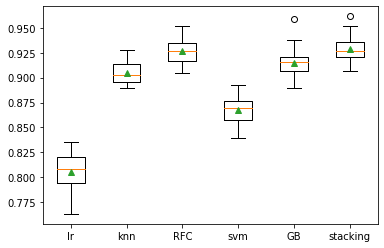

In [127]:
# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    
    level0.append(('knn', KNeighborsClassifier(n_neighbors= 3, p= 1, weights= 'distance')))
    level0.append(('RFC', RandomForestClassifier(max_depth= None, min_samples_leaf= 1, min_samples_split= 5, n_estimators= 100,random_state=42)))
    level0.append(('GB',GradientBoostingClassifier(subsample= 1.0, n_estimators= 100, min_samples_split= 10, min_samples_leaf= 2, max_depth= 7, learning_rate= 0.2,random_state=42)))
    
    # define meta learner model
    level1 = LogisticRegression(C= 10, penalty= 'l1', solver= 'liblinear')
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression(C= 10, penalty= 'l1', solver= 'liblinear',random_state=42)
    models['knn']=KNeighborsClassifier(n_neighbors= 3, p= 1, weights= 'distance')
    models['RFC']=RandomForestClassifier(max_depth= None, min_samples_leaf= 1, min_samples_split= 5, n_estimators= 100,random_state=42)
    models['svm']= SVC(kernel= 'rbf', gamma= 'scale', degree= 3, coef0= 2.0, C= 10,random_state=42)
    models['GB']=GradientBoostingClassifier(subsample= 1.0, n_estimators= 100, min_samples_split= 10, min_samples_leaf= 2, max_depth= 7, learning_rate= 0.2,random_state=42)
    models['stacking'] = get_stacking()
    return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores


# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
lr 0.806 (0.020),knn 0.904 (0.010),RFC 0.927 (0.012),svm 0.867 (0.014),GB 0.915 (0.014),stacking 0.929 (0.013)

In [128]:
level0 = list()

level0.append(('knn', KNeighborsClassifier(n_neighbors= 3, p= 1, weights= 'distance')))
level0.append(('RFC', RandomForestClassifier(max_depth= None, min_samples_leaf= 1, min_samples_split= 5, n_estimators= 100,random_state=42)))
level0.append(('GB',GradientBoostingClassifier(subsample= 1.0, n_estimators= 100, min_samples_split= 10, min_samples_leaf= 2, max_depth= 7, learning_rate= 0.2,random_state=42)))
    
    # define meta learner model
level1 = LogisticRegression(C= 10, penalty= 'l1', solver= 'liblinear')
# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

model.fit(X_train, y_train)

                           
                           






StackingClassifier(cv=5,
                   estimators=[('knn',
                                KNeighborsClassifier(n_neighbors=3, p=1,
                                                     weights='distance')),
                               ('RFC',
                                RandomForestClassifier(min_samples_split=5,
                                                       random_state=42)),
                               ('GB',
                                GradientBoostingClassifier(learning_rate=0.2,
                                                           max_depth=7,
                                                           min_samples_leaf=2,
                                                           min_samples_split=10,
                                                           random_state=42))],
                   final_estimator=LogisticRegression(C=10, penalty='l1',
                                                      solver='liblinear'))

# Validation Prediction

In [135]:
# define a function to ploting Confusion matrix
def plot_confusion_matrix(y_test, y_prediction):
    cm = metrics.confusion_matrix(y_test, y_prediction)
    ax = plt.subplot()
    ax = sns.heatmap(cm, annot=True, fmt='', cmap="Greens")
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['Dont Had Stroke', 'Had Stroke'])
    ax.yaxis.set_ticklabels(['Dont Had Stroke', 'Had Stroke']) 
    plt.show()

In [131]:

val_prediction = model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_prediction)
val_classification_report = classification_report(y_val, val_prediction)


print('Validation of Stacking Accuracy: %.3f' % (val_accuracy))
print('Validation Classification Report: ')
print(val_classification_report)



from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, auc, confusion_matrix, matthews_corrcoef


def print_classification_metrics(y_true, y_pred):
    # 1. Accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy: {accuracy}')

    # 2. Precision
    precision = precision_score(y_true, y_pred)
    print(f'Precision: {precision}')

    # 3. Recall
    recall = recall_score(y_true, y_pred)
    print(f'Recall: {recall}')

    # 4. F1 Score
    f1 = f1_score(y_true, y_pred)
    print(f'F1 Score: {f1}')

    # 5. Specificity
    specificity = confusion_matrix(y_true, y_pred)[0, 0] / (confusion_matrix(y_true, y_pred)[0, 0] + confusion_matrix(y_true, y_pred)[0, 1])
    print(f'Specificity: {specificity}')

    # 6. False Positive Rate (FPR)
    fpr = confusion_matrix(y_true, y_pred)[0, 1] / (confusion_matrix(y_true, y_pred)[0, 0] + confusion_matrix(y_true, y_pred)[0, 1])
    print(f'False Positive Rate: {fpr}')

    # 7. Area Under the Receiver Operating Characteristic (ROC) Curve (AUC-ROC)
    roc_auc = roc_auc_score(y_true, y_pred)
    print(f'AUC-ROC: {roc_auc}')

    # 8. Area Under the Precision-Recall (PR) Curve (AUC-PR)
    precision, recall, _ = precision_recall_curve(y_true, y_pred)
    pr_auc = auc(recall, precision)
    print(f'AUC-PR: {pr_auc}')

    # 9. Matthews Correlation Coefficient (MCC)
    mcc = matthews_corrcoef(y_true, y_pred)
    print(f'Matthews Correlation Coefficient: {mcc}')




Validation of Stacking Accuracy: 0.938
Validation Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       538
           1       0.93      0.94      0.94       507

    accuracy                           0.94      1045
   macro avg       0.94      0.94      0.94      1045
weighted avg       0.94      0.94      0.94      1045



In [133]:
from sklearn import metrics

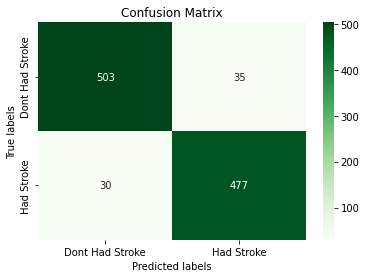

Accuracy: 0.937799043062201
Precision: 0.931640625
Recall: 0.9408284023668639
F1 Score: 0.9362119725220804
Specificity: 0.9349442379182156
False Positive Rate: 0.06505576208178439
AUC-ROC: 0.9378863201425398
AUC-PR: 0.9505885806690778
Matthews Correlation Coefficient: 0.8755640186760106


In [136]:


y_true = y_val
y_pred = val_prediction

plot_confusion_matrix(y_true, y_pred)
print_classification_metrics(y_true, y_pred)


# Testing Prediction

In [137]:
test_prediction = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_prediction)
test_classification_report = classification_report(y_test, test_prediction)


print('Validation of Stacking Accuracy: %.3f' % (test_accuracy))
print('Validation Classification Report: ')
print(test_classification_report)


Validation of Stacking Accuracy: 0.934
Validation Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       670
           1       0.93      0.94      0.93       636

    accuracy                           0.93      1306
   macro avg       0.93      0.93      0.93      1306
weighted avg       0.93      0.93      0.93      1306



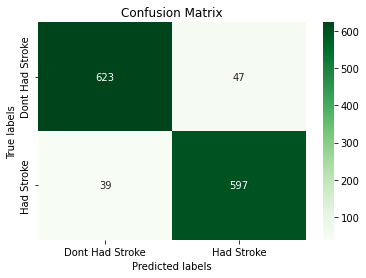

Accuracy: 0.9341500765696784
Precision: 0.9270186335403726
Recall: 0.9386792452830188
F1 Score: 0.9328125
Specificity: 0.9298507462686567
False Positive Rate: 0.07014925373134329
AUC-ROC: 0.9342649957758378
AUC-PR: 0.947780026701129
Matthews Correlation Coefficient: 0.8683180933437875


In [138]:

y_true = y_test
y_pred = test_prediction

plot_confusion_matrix(y_true, y_pred)
print_classification_metrics(y_true, y_pred)

# Stacking Model Interpretability:

In [139]:
import lime
import lime.lime_tabular


In [140]:
# Assuming model is your machine learning model
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=list(X_train.columns), class_names=['0', '1'], discretize_continuous=True)


In [141]:
instance = X_test.iloc[0]

# Assuming instance is a specific instance from your dataset
explanation = explainer.explain_instance(instance.values, model.predict_proba)


In [142]:
# Visualize the explanation
explanation.show_in_notebook()


#### For above case the y_test.iloc[0] is 1, hence we can look at the features which which played important role in classifying the label

In [143]:
instance = X.iloc[53]

# Assuming instance is a specific instance from your dataset
explanation = explainer.explain_instance(instance.values, model.predict_proba)
# Visualize the explanation
explanation.show_in_notebook()

#### For above case the y_test.iloc[53] is 0, hence we can look at the features which which played important role in classifying the label

# Blending Stacking Ensemble Model

In [144]:

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.base import clone
import numpy as np


In [145]:
# Train individual models
model1 = RandomForestClassifier(max_depth= None, min_samples_leaf= 1, min_samples_split= 5, n_estimators= 100,random_state=42)
model2 = GradientBoostingClassifier(subsample= 1.0, n_estimators= 100, min_samples_split= 10, min_samples_leaf= 2, max_depth= 7, learning_rate= 0.2,random_state=42)
model3 = LogisticRegression(C= 10, penalty= 'l1', solver= 'liblinear',random_state=42)

# Train models on the training set
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

# Make predictions on the validation set
pred1 = model1.predict(X_val)
pred2 = model2.predict(X_val)
pred3 = model3.predict(X_val)

# Create a meta-model (blender) to combine predictions
blender = LogisticRegression(random_state=42)

# Train the blender on the validation set predictions
blender.fit(np.column_stack((pred1, pred2, pred3)), y_val)

# Make predictions on new data
new_data = X_test  # Your new data
pred1_new = model1.predict(new_data)
pred2_new = model2.predict(new_data)
pred3_new = model3.predict(new_data)

# Combine predictions using the blender
final_predictions = blender.predict(np.column_stack((pred1_new, pred2_new, pred3_new)))

# Evaluate the performance
accuracy = accuracy_score(y_test, final_predictions)
print(f"Ensemble Model Accuracy: {accuracy}")


Ensemble Model Accuracy: 0.9326186830015314


In [146]:
test_classification_report = classification_report(y_test, final_predictions)


print('Validation of Blending Stacking Accuracy: %.3f' % (accuracy))
print('Validation Classification Report: ')
print(test_classification_report)

Validation of Blending Stacking Accuracy: 0.933
Validation Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       670
           1       0.91      0.95      0.93       636

    accuracy                           0.93      1306
   macro avg       0.93      0.93      0.93      1306
weighted avg       0.93      0.93      0.93      1306



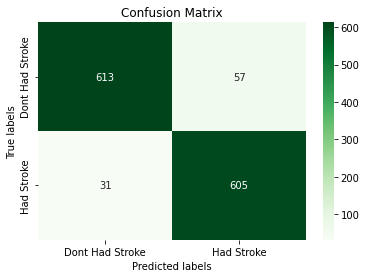

Accuracy: 0.9326186830015314
Precision: 0.9138972809667674
Recall: 0.9512578616352201
F1 Score: 0.9322033898305084
Specificity: 0.9149253731343283
False Positive Rate: 0.08507462686567165
AUC-ROC: 0.9330916173847742
AUC-PR: 0.9444458714541331
Matthews Correlation Coefficient: 0.8659719091078721


In [147]:
# Assuming 'y_true' is the true labels and 'y_pred' is the predicted labels
y_true = y_test
y_pred = final_predictions

plot_confusion_matrix(y_true, y_pred)
print_classification_metrics(y_true, y_pred)

# Blending Stacking Model Interpretation

In [148]:
from sklearn.metrics import accuracy_score
from interpret import show
from interpret.blackbox import ShapKernel
import shap
import numpy as np

In [149]:
explainer = shap.Explainer(blender, np.column_stack((pred1_new, pred2_new, pred3_new)))


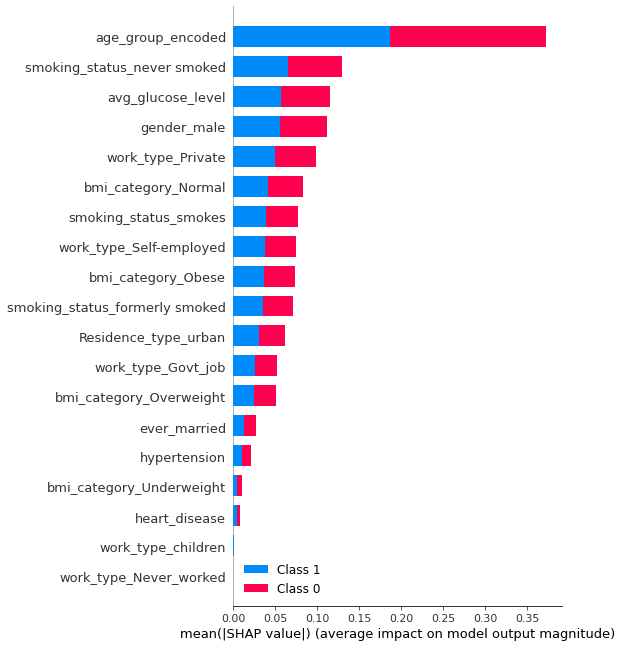

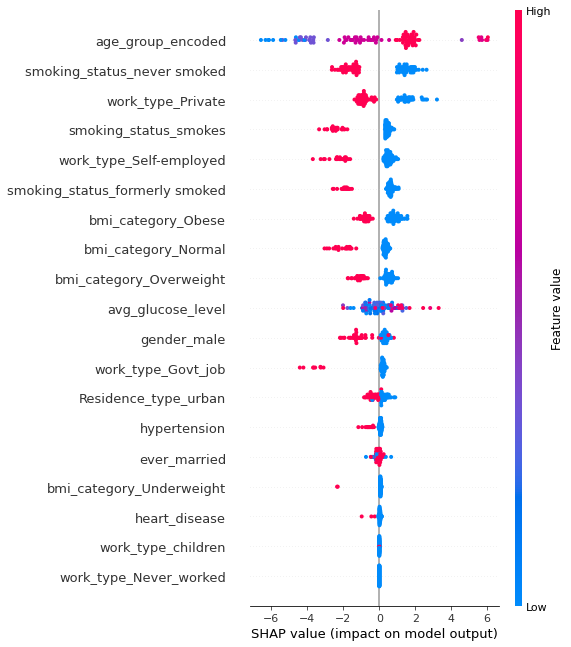

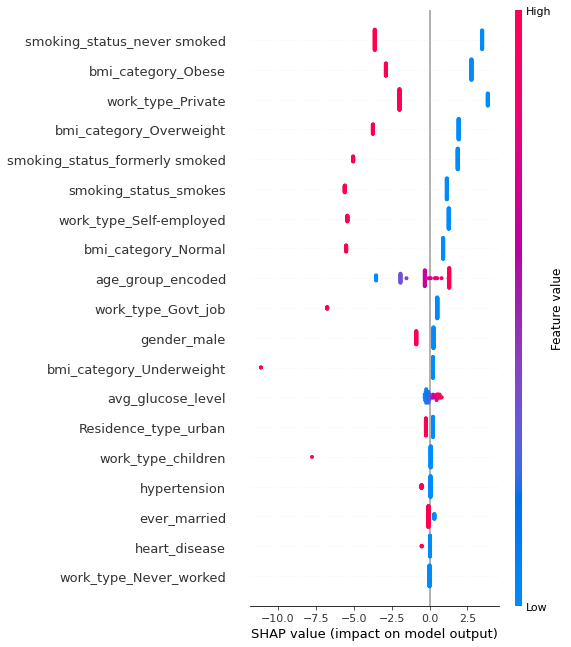

In [150]:

# Initialize SHAP explainer for each individual model
explainer1 = shap.Explainer(model1, X_train)
explainer2 = shap.Explainer(model2, X_train)
explainer3 = shap.Explainer(model3, X_train)

# Calculate SHAP values for a subset of the test data for each individual model
shap_values1 = explainer1.shap_values(X_test.iloc[:100, :])
shap_values2 = explainer2.shap_values(X_test.iloc[:100, :])
shap_values3 = explainer3.shap_values(X_test.iloc[:100, :])

# Visualize SHAP summary plots for each individual model
shap.summary_plot(shap_values1, X_test.iloc[:100, :])
shap.summary_plot(shap_values2, X_test.iloc[:100, :])
shap.summary_plot(shap_values3, X_test.iloc[:100, :])

# Deep learning model

In [176]:
from sklearn.linear_model import LinearRegression
from keras.callbacks import EarlyStopping
from keras import backend as K
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense,Dropout
from numpy import dstack
from sklearn.linear_model import LogisticRegression

In [177]:
model1 = Sequential()
model1.add(Dense(50,activation = 'relu',input_dim = 19))
model1.add(Dense(25,activation = 'relu'))
model1.add(Dense(1,activation = 'sigmoid'))

In [178]:

model1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 50)                1000      
                                                                 
 dense_33 (Dense)            (None, 25)                1275      
                                                                 
 dense_34 (Dense)            (None, 1)                 26        
                                                                 
Total params: 2301 (8.99 KB)
Trainable params: 2301 (8.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [179]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [180]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=[f1_m])
history = model1.fit(X_train, y_train,validation_data = (X_val,y_val),epochs = 100)

Epoch 1/100
131/131 [==============================] - 1s 2ms/step - loss: 0.5539 - f1_m: 0.7511 - val_loss: 0.4475 - val_f1_m: 0.7902
Epoch 2/100
131/131 [==============================] - 0s 906us/step - loss: 0.4418 - f1_m: 0.8036 - val_loss: 0.4009 - val_f1_m: 0.8203
Epoch 3/100
131/131 [==============================] - 0s 1ms/step - loss: 0.4124 - f1_m: 0.8104 - val_loss: 0.3831 - val_f1_m: 0.8326
Epoch 4/100
131/131 [==============================] - 0s 985us/step - loss: 0.3953 - f1_m: 0.8268 - val_loss: 0.3721 - val_f1_m: 0.8335
Epoch 5/100
131/131 [==============================] - 0s 909us/step - loss: 0.3795 - f1_m: 0.8330 - val_loss: 0.3589 - val_f1_m: 0.8447
Epoch 6/100
131/131 [==============================] - 0s 1ms/step - loss: 0.3652 - f1_m: 0.8419 - val_loss: 0.3440 - val_f1_m: 0.8483
Epoch 7/100
131/131 [==============================] - 0s 884us/step - loss: 0.3500 - f1_m: 0.8483 - val_loss: 0.3482 - val_f1_m: 0.8355
Epoch 8/100
131/131 [==========================

Epoch 61/100
131/131 [==============================] - 0s 956us/step - loss: 0.1902 - f1_m: 0.9228 - val_loss: 0.2745 - val_f1_m: 0.8883
Epoch 62/100
131/131 [==============================] - 0s 1ms/step - loss: 0.1941 - f1_m: 0.9142 - val_loss: 0.2610 - val_f1_m: 0.8949
Epoch 63/100
131/131 [==============================] - 0s 889us/step - loss: 0.1917 - f1_m: 0.9216 - val_loss: 0.2576 - val_f1_m: 0.9064
Epoch 64/100
131/131 [==============================] - 0s 868us/step - loss: 0.1883 - f1_m: 0.9268 - val_loss: 0.2705 - val_f1_m: 0.8971
Epoch 65/100
131/131 [==============================] - 0s 931us/step - loss: 0.1908 - f1_m: 0.9206 - val_loss: 0.2642 - val_f1_m: 0.8976
Epoch 66/100
131/131 [==============================] - 0s 941us/step - loss: 0.1897 - f1_m: 0.9243 - val_loss: 0.2911 - val_f1_m: 0.8794
Epoch 67/100
131/131 [==============================] - 0s 990us/step - loss: 0.1904 - f1_m: 0.9222 - val_loss: 0.2666 - val_f1_m: 0.8991
Epoch 68/100
131/131 [==============

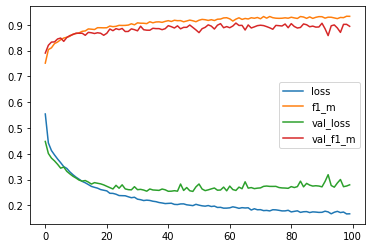

In [181]:
plt.plot(history.history['loss'])
plt.plot(history.history['f1_m'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_f1_m'])
plt.legend(['loss','f1_m',"val_loss",'val_f1_m'])
plt.show()

In [182]:
model1.save('model1.h5')

In [183]:
model2 = Sequential()
model2.add(Dense(25,activation = 'relu',input_dim = 19))
model2.add(Dense(25,activation = 'relu'))
model2.add(Dense(10,activation = 'relu'))
model2.add(Dense(1,activation = 'sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=[f1_m])
history1 = model2.fit(X_train,y_train,validation_data = (X_val,y_val),epochs = 100)

Epoch 1/100
131/131 [==============================] - 1s 2ms/step - loss: 0.5852 - f1_m: 0.6859 - val_loss: 0.4565 - val_f1_m: 0.7859
Epoch 2/100
131/131 [==============================] - 0s 993us/step - loss: 0.4474 - f1_m: 0.8022 - val_loss: 0.4103 - val_f1_m: 0.7901
Epoch 3/100
131/131 [==============================] - 0s 1ms/step - loss: 0.4150 - f1_m: 0.8176 - val_loss: 0.3845 - val_f1_m: 0.8240
Epoch 4/100
131/131 [==============================] - 0s 1ms/step - loss: 0.3892 - f1_m: 0.8285 - val_loss: 0.3683 - val_f1_m: 0.8277
Epoch 5/100
131/131 [==============================] - 0s 1ms/step - loss: 0.3713 - f1_m: 0.8365 - val_loss: 0.3561 - val_f1_m: 0.8381
Epoch 6/100
131/131 [==============================] - 0s 1ms/step - loss: 0.3649 - f1_m: 0.8429 - val_loss: 0.3416 - val_f1_m: 0.8444
Epoch 7/100
131/131 [==============================] - 0s 1ms/step - loss: 0.3391 - f1_m: 0.8555 - val_loss: 0.3311 - val_f1_m: 0.8514
Epoch 8/100
131/131 [==============================] 

131/131 [==============================] - 0s 1ms/step - loss: 0.2041 - f1_m: 0.9087 - val_loss: 0.2924 - val_f1_m: 0.8757
Epoch 62/100
131/131 [==============================] - 0s 1ms/step - loss: 0.1981 - f1_m: 0.9154 - val_loss: 0.2868 - val_f1_m: 0.8887
Epoch 63/100
131/131 [==============================] - 0s 1ms/step - loss: 0.1988 - f1_m: 0.9147 - val_loss: 0.2882 - val_f1_m: 0.8837
Epoch 64/100
131/131 [==============================] - 0s 1ms/step - loss: 0.2023 - f1_m: 0.9165 - val_loss: 0.2998 - val_f1_m: 0.8679
Epoch 65/100
131/131 [==============================] - 0s 1ms/step - loss: 0.1998 - f1_m: 0.9164 - val_loss: 0.2913 - val_f1_m: 0.8730
Epoch 66/100
131/131 [==============================] - 0s 1ms/step - loss: 0.1959 - f1_m: 0.9171 - val_loss: 0.2977 - val_f1_m: 0.8724
Epoch 67/100
131/131 [==============================] - 0s 1ms/step - loss: 0.1959 - f1_m: 0.9158 - val_loss: 0.2874 - val_f1_m: 0.8898
Epoch 68/100
131/131 [==============================] - 0s 1m

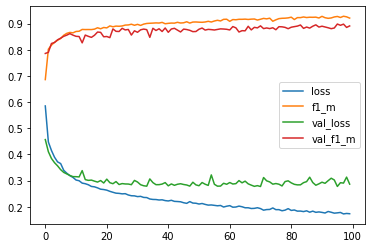

In [184]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['f1_m'])
plt.plot(history1.history['val_loss'])
plt.plot(history1.history['val_f1_m'])
plt.legend(['loss','f1_m',"val_loss",'val_f1_m'])
plt.show()

In [185]:
model2.save('model2.h5')

In [186]:
model3 = Sequential()
model3.add(Dense(50,activation = 'relu',input_dim = 19))
model3.add(Dense(25,activation = 'relu'))
model3.add(Dense(25,activation = 'relu'))
model3.add(Dropout(0.1))
model3.add(Dense(10,activation = 'relu'))
model3.add(Dense(1,activation = 'sigmoid'))

model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=[f1_m])
history3 = model3.fit(X_train,y_train,validation_data = (X_val,y_val),epochs = 100)

Epoch 1/100
131/131 [==============================] - 1s 2ms/step - loss: 0.5530 - f1_m: 0.7471 - val_loss: 0.4282 - val_f1_m: 0.8080
Epoch 2/100
131/131 [==============================] - 0s 1ms/step - loss: 0.4384 - f1_m: 0.8033 - val_loss: 0.4155 - val_f1_m: 0.8140
Epoch 3/100
131/131 [==============================] - 0s 1ms/step - loss: 0.4168 - f1_m: 0.8229 - val_loss: 0.3898 - val_f1_m: 0.8288
Epoch 4/100
131/131 [==============================] - 0s 1ms/step - loss: 0.3906 - f1_m: 0.8345 - val_loss: 0.3703 - val_f1_m: 0.8481
Epoch 5/100
131/131 [==============================] - 0s 1ms/step - loss: 0.3714 - f1_m: 0.8421 - val_loss: 0.3496 - val_f1_m: 0.8426
Epoch 6/100
131/131 [==============================] - 0s 1ms/step - loss: 0.3492 - f1_m: 0.8531 - val_loss: 0.3284 - val_f1_m: 0.8457
Epoch 7/100
131/131 [==============================] - 0s 1ms/step - loss: 0.3210 - f1_m: 0.8625 - val_loss: 0.3305 - val_f1_m: 0.8479
Epoch 8/100
131/131 [==============================] - 

131/131 [==============================] - 0s 1ms/step - loss: 0.1625 - f1_m: 0.9326 - val_loss: 0.2555 - val_f1_m: 0.9124
Epoch 62/100
131/131 [==============================] - 0s 1ms/step - loss: 0.1549 - f1_m: 0.9349 - val_loss: 0.2596 - val_f1_m: 0.9124
Epoch 63/100
131/131 [==============================] - 0s 1ms/step - loss: 0.1597 - f1_m: 0.9343 - val_loss: 0.2678 - val_f1_m: 0.9009
Epoch 64/100
131/131 [==============================] - 0s 1ms/step - loss: 0.1591 - f1_m: 0.9338 - val_loss: 0.2524 - val_f1_m: 0.9139
Epoch 65/100
131/131 [==============================] - 0s 1ms/step - loss: 0.1574 - f1_m: 0.9386 - val_loss: 0.2701 - val_f1_m: 0.9073
Epoch 66/100
131/131 [==============================] - 0s 1ms/step - loss: 0.1504 - f1_m: 0.9402 - val_loss: 0.2589 - val_f1_m: 0.9217
Epoch 67/100
131/131 [==============================] - 0s 1ms/step - loss: 0.1571 - f1_m: 0.9348 - val_loss: 0.2588 - val_f1_m: 0.9035
Epoch 68/100
131/131 [==============================] - 0s 1m

In [187]:
model3.save('model3.h5')

In [188]:
model4 = Sequential()
model4.add(Dense(50,activation = 'relu',input_dim = 19))
model4.add(Dense(25,activation = 'relu'))
model4.add(Dropout(0.1))
model4.add(Dense(10,activation = 'relu'))
model4.add(Dense(1,activation = 'sigmoid'))

model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=[f1_m])
history4 = model4.fit(X_train,y_train,validation_data = (X_val,y_val),epochs = 100)

Epoch 1/100
131/131 [==============================] - 1s 2ms/step - loss: 0.5909 - f1_m: 0.7615 - val_loss: 0.4826 - val_f1_m: 0.8021
Epoch 2/100
131/131 [==============================] - 0s 1ms/step - loss: 0.4691 - f1_m: 0.7904 - val_loss: 0.4186 - val_f1_m: 0.8141
Epoch 3/100
131/131 [==============================] - 0s 1ms/step - loss: 0.4323 - f1_m: 0.8027 - val_loss: 0.4066 - val_f1_m: 0.8283
Epoch 4/100
131/131 [==============================] - 0s 1ms/step - loss: 0.4131 - f1_m: 0.8129 - val_loss: 0.3858 - val_f1_m: 0.8309
Epoch 5/100
131/131 [==============================] - 0s 1ms/step - loss: 0.3948 - f1_m: 0.8276 - val_loss: 0.3728 - val_f1_m: 0.8245
Epoch 6/100
131/131 [==============================] - 0s 1ms/step - loss: 0.3818 - f1_m: 0.8285 - val_loss: 0.3752 - val_f1_m: 0.8356
Epoch 7/100
131/131 [==============================] - 0s 1ms/step - loss: 0.3695 - f1_m: 0.8396 - val_loss: 0.3581 - val_f1_m: 0.8175
Epoch 8/100
131/131 [==============================] - 

131/131 [==============================] - 0s 1ms/step - loss: 0.2083 - f1_m: 0.9130 - val_loss: 0.2571 - val_f1_m: 0.8965
Epoch 62/100
131/131 [==============================] - 0s 1ms/step - loss: 0.2056 - f1_m: 0.9162 - val_loss: 0.2510 - val_f1_m: 0.9047
Epoch 63/100
131/131 [==============================] - 0s 1ms/step - loss: 0.2060 - f1_m: 0.9163 - val_loss: 0.2531 - val_f1_m: 0.9008
Epoch 64/100
131/131 [==============================] - 0s 1ms/step - loss: 0.1974 - f1_m: 0.9211 - val_loss: 0.2517 - val_f1_m: 0.8943
Epoch 65/100
131/131 [==============================] - 0s 1ms/step - loss: 0.1985 - f1_m: 0.9200 - val_loss: 0.2560 - val_f1_m: 0.8932
Epoch 66/100
131/131 [==============================] - 0s 1ms/step - loss: 0.1987 - f1_m: 0.9184 - val_loss: 0.2573 - val_f1_m: 0.8951
Epoch 67/100
131/131 [==============================] - 0s 1ms/step - loss: 0.2059 - f1_m: 0.9096 - val_loss: 0.2556 - val_f1_m: 0.8917
Epoch 68/100
131/131 [==============================] - 0s 1m

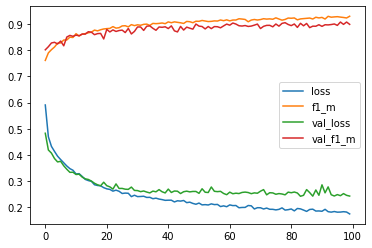

In [189]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['f1_m'])
plt.plot(history4.history['val_loss'])
plt.plot(history4.history['val_f1_m'])
plt.legend(['loss','f1_m',"val_loss",'val_f1_m'])
plt.show()

In [190]:
model4.save('model4.h5')

In [191]:

dependencies = {
    'f1_m': f1_m
}


In [192]:

# load models from file
def load_all_models(n_models):
    all_models = list()
    for i in range(n_models):
        # define filename for this ensemble
        filename = '/home/himanshu/Documents/upgrad M.Sc/ENSEMBLE-BASED-PREDICTIONS-OF-BRAIN-STROKES/model' + str(i + 1) + '.h5'
        # load model from file
        model = load_model(filename,custom_objects=dependencies)
        # add to list of members
        all_models.append(model)
        print('>loaded %s' % filename)
    return all_models

In [193]:
n_members = 4
members = load_all_models(n_members)
print('Loaded %d models' % len(members))

>loaded /home/himanshu/Documents/upgrad M.Sc/ENSEMBLE-BASED-PREDICTIONS-OF-BRAIN-STROKES/model1.h5
>loaded /home/himanshu/Documents/upgrad M.Sc/ENSEMBLE-BASED-PREDICTIONS-OF-BRAIN-STROKES/model2.h5
>loaded /home/himanshu/Documents/upgrad M.Sc/ENSEMBLE-BASED-PREDICTIONS-OF-BRAIN-STROKES/model3.h5
>loaded /home/himanshu/Documents/upgrad M.Sc/ENSEMBLE-BASED-PREDICTIONS-OF-BRAIN-STROKES/model4.h5
Loaded 4 models


In [194]:

# create stacked model input dataset as outputs from the ensemble
def stacked_dataset(members, inputX):
    stackX = None
    for model in members:
        # make prediction
        yhat = model.predict(inputX, verbose=0)
        # stack predictions into [rows, members, probabilities]
        if stackX is None:
            stackX = yhat #
        else:
            stackX = dstack((stackX, yhat))
    # flatten predictions to [rows, members x probabilities]
    stackX = stackX.reshape((stackX.shape[0], stackX.shape[1]*stackX.shape[2]))
    return stackX

In [195]:


# fit a model based on the outputs from the ensemble members
def fit_stacked_model(members, inputX, inputy):
    # create dataset using ensemble
    stackedX = stacked_dataset(members, inputX)
    # fit standalone model
    model = LogisticRegression() #meta learner
    model.fit(stackedX, inputy)
    return model

In [196]:
model = fit_stacked_model(members, X_val,y_val)

In [197]:


# make a prediction with the stacked model
def stacked_prediction(members, model, inputX):
    # create dataset using ensemble
    stackedX = stacked_dataset(members, inputX)
    # make a prediction
    yhat = model.predict(stackedX)
    return yhat

In [198]:
# evaluate model on test set
yhat = stacked_prediction(members, model, X_test)
score = f1_m(y_test/1.0, yhat/1.0)
print('Stacked F Score:', score)
     

Stacked F Score: tf.Tensor(0.9128758172640883, shape=(), dtype=float64)


In [199]:
test_classification_report = classification_report(y_test, yhat)


print('Validation of Stacking Accuracy: %.3f' % (score))
print('Validation Classification Report: ')
print(test_classification_report)

Validation of Stacking Accuracy: 0.913
Validation Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       670
           1       0.90      0.93      0.91       636

    accuracy                           0.91      1306
   macro avg       0.91      0.91      0.91      1306
weighted avg       0.91      0.91      0.91      1306



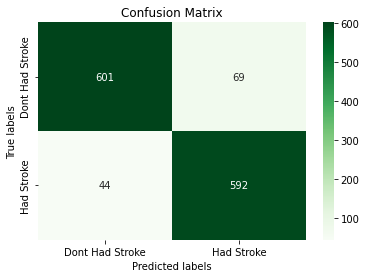

Accuracy: 0.9134762633996937
Precision: 0.8956127080181543
Recall: 0.9308176100628931
F1 Score: 0.912875867386276
Specificity: 0.8970149253731343
False Positive Rate: 0.10298507462686567
AUC-ROC: 0.9139162677180137
AUC-PR: 0.9300604882901409
Matthews Correlation Coefficient: 0.8276140657676199


In [200]:
# Assuming 'y_true' is the true labels and 'y_pred' is the predicted labels
y_true = y_test
y_pred = yhat

plot_confusion_matrix(y_true, y_pred)
print_classification_metrics(y_true, y_pred)